In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
import librosa

#Access to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#The file path for google drive

sample_path = '/content/drive/MyDrive/Data/MLEndHW/sample/Part2/max_hum-6classes/*.wav' 
files = glob.glob(sample_path)
len(files)

1445

**Preprocessing step:**

In [ ]:
#new array which save the file_name, participant_ID, interpretation_type, interpretation_number and song from files

hum_class = [] 
for file in files:
  file_name = file.split('/')[-1] #Extract the file name
  participant_ID = file.split('/')[-1].split('_')[0] #extract the participant ID from file name
  interpretation_type = file.split('/')[-1].split('_')[1] #extract the interpretation type from file name
  #print(file) # useful know which file gives an error 
  interpretation_number = file.split('/')[-1].split('_')[2] #extract the interpretation number from file name
  #print(file) # useful know which file gives an error 
  song = file.split('/')[-1].split('_')[3].split('.')[0] #extract the song name from file name

  if (song == '[Panther]') or (song== '[ Panther ]') or (song== '[  Panther ]') or (song== '[panther]'):  #remove the [] from song 
    song = song.replace('[','').replace(']','')
  if (song == '[Rain]') or (song== '[ Rain ]') or (song== '[  Rain ]') or (song== '[rain]'):  #remove the [] from song 
    song = song.replace('[','').replace(']','')
  if (song == '[Frozen]') or (song== '[ Frozen ]') or (song== '[  Frozen ]') or (song== '[frozen]'):  #remove the [] from song 
    song = song.replace('[','').replace(']','')
  if (song == '[Potter]') or (song== '[ Potter ]') or (song== '[  Potter ]') or (song== '[potter]'):  #remove the [] from song 
    song = song.replace('[','').replace(']','')
  if (song == '[Hakuna]') or (song== '[ Hakuna ]') or (song== '[  Hakuna ]') or (song== '[hakuna]') or (song== '[Hukuna]'):  #remove the [] from song 
    song = song.replace('[','').replace(']','')

  if (song == 'Panther ') or (song == ' Panther ') or (song == ' Panther'): #remove the space from song name
    song = song.replace(' ','')
  if (song == 'Rain ') or (song == ' Rain ') or (song == ' Rain'): #remove the space from song name
    song = song.replace(' ','')
  if (song == 'Frozen ') or (song == ' Frozen ') or (song == ' Frozen '): #remove the space from song name
    song = song.replace(' ','')
  if (song == 'Potter ') or (song == ' Potter ') or (song == ' Potter '): #remove the space from song name
    song = song.replace(' ','')  
  if (song == 'Hakuna ') or (song == ' Hakuna ') or (song == ' Hakuna '): #remove the space from song name
    song = song.replace(' ','')  
    
  hum_class.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

hum_class

[['S212_hum_4_Panther.wav', 'S212', 'hum', '4', 'Panther'],
 ['S85_hum_2_Panther.wav', 'S85', 'hum', '2', 'Panther'],
 ['S97_hum_2_Panther.wav', 'S97', 'hum', '2', 'Panther'],
 ['S85_hum_4_Panther.wav', 'S85', 'hum', '4', 'Panther'],
 ['S216_hum_2_Panther.wav', 'S216', 'hum', '2', 'Panther'],
 ['S65_hum_4_Panther.wav', 'S65', 'hum', '4', 'Panther'],
 ['S97_hum_4_Panther.wav', 'S97', 'hum', '4', 'Panther'],
 ['S99_hum_2_[Panther].wav', 'S99', 'hum', '2', 'Panther'],
 ['S100_hum_2_Panther.wav', 'S100', 'hum', '2', 'Panther'],
 ['S102_hum_2_Panther.wav', 'S102', 'hum', '2', 'Panther'],
 ['S65_hum_2_Panther.wav', 'S65', 'hum', '2', 'Panther'],
 ['S212_hum_2_Panther.wav', 'S212', 'hum', '2', 'Panther'],
 ['S190_hum_2_Panther.wav', 'S190', 'hum', '2', 'Panther'],
 ['S216_hum_4_Panther.wav', 'S216', 'hum', '4', 'Panther'],
 ['S67_hum_2_Panther.wav', 'S67', 'hum', '2', 'Panther'],
 ['S99_hum_1_[Panther].wav', 'S99', 'hum', '1', 'Panther'],
 ['S100_hum_4_Panther.wav', 'S100', 'hum', '4', 'Panth

In [ ]:
# Transfer the Potter_Star array to DataFrame
hum_class_df = pd.DataFrame(hum_class,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
hum_class_df

,participant,interpretation,number,song
file_id,,,,
S212_hum_4_Panther.wav,S212,hum,4,Panther
S85_hum_2_Panther.wav,S85,hum,2,Panther
S97_hum_2_Panther.wav,S97,hum,2,Panther
S85_hum_4_Panther.wav,S85,hum,4,Panther
S216_hum_2_Panther.wav,S216,hum,2,Panther
...,...,...,...,...
S26_hum_4_Panther.wav,S26,hum,4,Panther
S202_hum_4_Panther.wav,S202,hum,4,Panther
S123_hum_2_Panther.wav,S123,hum,2,Panther


In [ ]:
#Check values in interpretation column, which just needs the hum (small letter).
from collections import Counter
Counter(hum_class_df['interpretation'])

Counter({'Hum': 60, 'Hun': 1, 'ham': 1, 'hum': 1383})

In [ ]:
#Change the wrong spelling or capital letter to hum.
for i in range(len(hum_class_df)):
  if hum_class_df['interpretation'][i]=='Hum' or  hum_class_df['interpretation'][i]=='ham' or hum_class_df['interpretation'][i]=='Hun':
    hum_class_df['interpretation'][i]='hum'

Counter(hum_class_df['interpretation'])

Counter({'hum': 1445})

In [ ]:
#Check values in song column, which just needs the Potter and StarWars (upper case).
from collections import Counter 
Counter(hum_class_df['song'])

Counter({'(potter)': 2,
         'Frozen': 250,
         'HaKuna': 1,
         'Hakana': 1,
         'Haknua': 1,
         'Hakuna': 291,
         'HakunaMatata': 4,
         'Harry': 1,
         'Hukuna': 1,
         'Pain': 1,
         'Panther': 288,
         'Pink Panther': 2,
         'PinkPanther': 2,
         'Potter': 271,
         'Potterwav': 1,
         'Rain': 282,
         'The Rain': 2,
         'frozen': 3,
         'hakuna': 7,
         'hakuna matata': 1,
         'hakunamatata': 2,
         'harry potter': 1,
         'harrypotter': 1,
         'letitgo': 2,
         'panther': 5,
         'pink panther': 1,
         'pinkpanther': 1,
         'potter': 12,
         'rain': 6,
         'singing in the rain': 2})

In [ ]:
#some songs names make a confused like Pain, so back to the dataset to listen and select which is a song
detec = hum_class_df.loc[hum_class_df['song'] =="Pain"]
detec

,participant,interpretation,number,song
file_id,,,,
S194_hum_2_Pain.wav,S194,hum,2,Pain


In [ ]:
#Change the wrong spelling or small letter to Potter or StarWars.
for i in range(len(hum_class_df)):
  if (hum_class_df['song'][i]=='Pain') or (hum_class_df['song'][i]=='The Rain') or (hum_class_df['song'][i]=='rain') or (hum_class_df['song'][i]=='singing in the rain'):
    hum_class_df['song'][i]='Rain'
  if hum_class_df['song'][i]=='frozen' or (hum_class_df['song'][i]=='letitgo'):
    hum_class_df['song'][i]='Frozen'
  if hum_class_df['song'][i]=='panther' or (hum_class_df['song'][i]=='Pink Panther') or (hum_class_df['song'][i]=='PinkPanther') or (hum_class_df['song'][i]=='pink panther') or (hum_class_df['song'][i]=='pinkpanther') :
    hum_class_df['song'][i]='Panther'   
  if hum_class_df['song'][i]=='harry potter' or (hum_class_df['song'][i]=='harrypotter') or (hum_class_df['song'][i]=='potter') or (hum_class_df['song'][i]=='Potterwav') or (hum_class_df['song'][i]=='(potter)') or (hum_class_df['song'][i]=='Harry'):
    hum_class_df['song'][i]='Potter'   
  if hum_class_df['song'][i]=='Haknua' or (hum_class_df['song'][i]=='hakuna') or (hum_class_df['song'][i]=='Hakana') or (hum_class_df['song'][i]=='HaKuna') or (hum_class_df['song'][i]=='HakunaMatata') or (hum_class_df['song'][i]=='hakuna matata') or (hum_class_df['song'][i]=='hakunamatata') or (hum_class_df['song'][i]=='Hukuna'):
    hum_class_df['song'][i]='Hakuna'   

Counter(hum_class_df['song'])


Counter({'Frozen': 255,
         'Hakuna': 309,
         'Panther': 299,
         'Potter': 289,
         'Rain': 293})

Counter({'Hakuna': 309, 'Panther': 299, 'Rain': 293, 'Potter': 289, 'Frozen': 255})


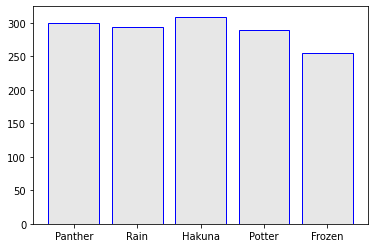

In [ ]:
#display by bar plot the StarWars and Potter values in dataset
from matplotlib import pyplot
# summarize the number of songs in each class
counter = Counter(hum_class_df['song'])
print(counter)

# plot the distribution
pyplot.bar(counter.keys(), counter.values(), color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
pyplot.show()

In [ ]:
#drop some columes before features extraction step
hum_class_df = hum_class_df.drop('participant',axis=1)
hum_class_df = hum_class_df.drop('number',axis=1)
hum_class_df = hum_class_df.drop('interpretation',axis=1)
hum_class_df

,song
file_id,
S212_hum_4_Panther.wav,Panther
S85_hum_2_Panther.wav,Panther
S97_hum_2_Panther.wav,Panther
S85_hum_4_Panther.wav,Panther
S216_hum_2_Panther.wav,Panther
...,...
S26_hum_4_Panther.wav,Panther
S202_hum_4_Panther.wav,Panther
S123_hum_2_Panther.wav,Panther


**Features extraction:**

In [ ]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [ ]:
#Features extraction in this function which used power, pitch_mean, pitch_std, and voiced_fr other features did not use because they decreased the accuracy

def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
    #fileID = file.split('/')[-1]
    file_name = file.split('/')[-1] #y will be song name 
    #print(file_name)
    yi = labels_file.loc[file_name]['song']

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)

    #spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=fs) 
    #mfcc=librosa.feature.mfcc(y=x , sr=fs) #Random Forest      
    #roll=librosa.feature.spectral_rolloff(y=x, sr=fs)
    #zero_crossing=librosa.feature.zero_crossing_rate(x) 
    #rms=librosa.feature.rms(y=x)
#-----
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)
    #pitch_mfcc = np.nanmean(mfcc) if np.mean(np.isnan(mfcc))<1 else 0
    #pitch_roll = np.nanmean(roll) if np.mean(np.isnan(roll))<1 else 0 
    #pitch_zero_crossing = np.nanmean(zero_crossing) if np.mean(np.isnan(zero_crossing))<1 else 0
    #pitch_rms = np.nanmean(rms) if np.mean(np.isnan(rms))<1 else 0 
    #pitch_spec_bw = np.nanmean(spec_bw) if np.mean(np.isnan(spec_bw))<1 else 0

    xi = [power, pitch_mean,pitch_std, voiced_fr] #add features' number in array
    X.append(xi)  #add xi in X array
    y.append(yi)  #add songs name in y array

  return np.array(X),np.array(y)

In [ ]:
#Recall the function which extracts the features 
X,y = getXy(files, labels_file=hum_class_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 1445/1445 [1:16:22<00:00,  3.17s/it]


In [ ]:
#Create a new dataframe which include the features with Potter_Star_df values
from pandas.core.frame import DataFrame

nweDF = hum_class_df
data_c = DataFrame(X) #add X values which output from getXy function
data_c.columns = ['power','pitch_mean','pitch_std','voiced_fr']

#print(data_c)
power= data_c['power'].tolist()
pitch_mean= data_c['pitch_mean'].tolist()
pitch_std= data_c['pitch_std'].tolist()
voiced_fr= data_c['voiced_fr'].tolist()

nweDF['power']= power
nweDF['pitch_mean']= pitch_mean
nweDF['pitch_std']= pitch_std
nweDF['voiced_fr']= voiced_fr
nweDF=nweDF.drop([ 'song'], axis=1)

nweDF

,power,pitch_mean,pitch_std,voiced_fr
file_id,,,,
S212_hum_4_Panther.wav,0.019779,284.821844,98.336367,0.659270
S85_hum_2_Panther.wav,0.044552,144.160353,34.115269,0.644181
S97_hum_2_Panther.wav,0.031951,190.244483,37.107858,0.794610
S85_hum_4_Panther.wav,0.041251,144.074226,33.855846,0.680397
S216_hum_2_Panther.wav,0.041642,165.227093,37.949366,0.686795
...,...,...,...,...
S26_hum_4_Panther.wav,0.004586,275.390973,47.324992,0.675660
S202_hum_4_Panther.wav,0.053723,262.192378,42.364899,0.655306
S123_hum_2_Panther.wav,0.026305,138.664379,16.981282,0.725943


In [ ]:
#save nweDF dataframe in CSV file which helps to save time 
nweDF2 = nweDF.to_csv('/content/drive/MyDrive/Data/MLEndHW/sample/Harry_star/advan.csv') #save it 
nweDF = nweDF2.read_csv('/content/drive/MyDrive/Data/MLEndHW/sample/Harry_star/advan.csv.csv')

y_new = y

In [ ]:
#Size of X and y
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)

The shape of X is (1445, 4)
The shape of y is (1445,)


**Modelling:**

In [ ]:
from sklearn.model_selection import train_test_split

#Split X and y into training and validation sets which represents 80% and 20% respectively
X_train, X_val, y_train, y_val = train_test_split(nweDF,y,test_size=0.2, random_state=10)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1156, 4), (289, 4), (1156,), (289,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

#Using three classifications which will choose the best accuracy

#First classifier
nca = NeighborhoodComponentsAnalysis()
knn =   KNeighborsClassifier()
knn_pipe = Pipeline([('nca', nca), ('knn',knn)])
knn_pipe.fit(X_train, y_train) #fit the training set

print('The Training Accuracy of KNeighbors Classifier: {0:0.2f} '.format(knn_pipe.score(X_train, y_train)))
print('The Validation Accuracy of KNeighbors Classifier: {0:0.2f} '.format(knn_pipe.score(X_val, y_val)))
print("----------------------------")

#second classifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train) #fit the training set
print('The Training Accuracy of Decision Tree: {0:0.2f} '.format(dt.score(X_train, y_train)))
print('The Validation Accuracy of Decision Tree: {0:0.2f} '.format(dt.score(X_val, y_val)))
print("----------------------------")

#Third classifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train) #fit the training set

print('The Training Accuracy of Random Forest: {0:0.2f} '.format(classifier_rf.score(X_train, y_train)))
print('The Validation Accuracy of Random Forest: {0:0.2f} '.format(classifier_rf.score(X_val, y_val)))

The Training Accuracy of KNeighbors Classifier: 0.64 
The Validation Accuracy of KNeighbors Classifier: 0.53 
----------------------------
The Training Accuracy of Decision Tree: 1.00 
The Validation Accuracy of Decision Tree: 0.42 
----------------------------
The Training Accuracy of Random Forest: 1.00 
The Validation Accuracy of Random Forest: 0.49 


In [ ]:
#Comparing with three classifications, Decision Tree and  Random Forest Classifier are overfitting, 
#KNeighbors Classifier is better but needs to improve the accuracy

Class=Panther, n=309 (21.38%)
Class=Rain, n=309 (21.38%)
Class=Hakuna, n=309 (21.38%)
Class=Potter, n=309 (21.38%)
Class=Frozen, n=309 (21.38%)


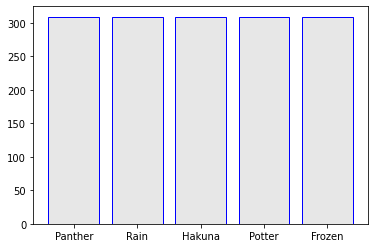

In [ ]:
#using SMOTE make all classes have the same size (number files)

from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE(random_state=0)
X_res, y_res = oversample.fit_resample(X, y)

# summarize distribution
counter = Counter(y_res)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.2f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values(), color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
pyplot.show()

In [ ]:
#Resplit the data(new size) after equal the file number

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X_res, y_res,test_size=0.2, random_state=10)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1236, 4), (309, 4), (1236,), (309,))

In [ ]:
#refit the 
#First classifier X_train and y_train in the same classifiers

#first classifier
knn_pipe = Pipeline([('nca', NeighborhoodComponentsAnalysis()), ('knn', KNeighborsClassifier())])
knn_pipe.fit(X_train, y_train) #fit the training set
print('The Training Accuracy of KNeighbors Classifier: {0:0.2f} '.format(knn_pipe.score(X_train, y_train)))
print('The Validation Accuracy of KNeighbors Classifier: {0:0.2f} '.format(knn_pipe.score(X_val, y_val)))
print("----------------------------")

#second classifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train) #fit the training set
print('The Training Accuracy of Decision Tree: {0:0.2f} '.format(dt.score(X_train, y_train)))
print('The Validation Accuracy of Decision Tree: {0:0.2f} '.format(dt.score(X_val, y_val)))
print("----------------------------")

#Third classifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train) #fit the training set

print('The Training Accuracy of Random Forest: {0:0.2f} '.format(classifier_rf.score(X_train, y_train)))
print('The Validation Accuracy of Random Forest: {0:0.2f} '.format(classifier_rf.score(X_val, y_val)))

The Training Accuracy of KNeighbors Classifier: 0.65 
The Validation Accuracy of KNeighbors Classifier: 0.57 
----------------------------
The Training Accuracy of Decision Tree: 1.00 
The Validation Accuracy of Decision Tree: 0.48 
----------------------------
The Training Accuracy of Random Forest: 1.00 
The Validation Accuracy of Random Forest: 0.55 


In [ ]:
# trying edit the parameters to improve the score
nca = NeighborhoodComponentsAnalysis()
knn = KNeighborsClassifier(n_neighbors= 5) # did not find any number improve the score, so using 5 is default int in n_neighbors
knn_pipe = Pipeline([('nca', nca), ('knn', knn)])
knn_pipe.fit(X_train, y_train) #fit the training set

yt_p = knn_pipe.predict(X_train) 
yv_p = knn_pipe.predict(X_val)

print('The Training Accuracy: {0:0.2f} '.format(knn_pipe.score(X_train, y_train)))
print('The Validation Accuracy: {0:0.2f} '.format(knn_pipe.score(X_val, y_val)))

The Training Accuracy: 0.65 
The Validation Accuracy: 0.57 


In [ ]:
# trying using GridSearchCV which might improve the accuracy 

from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("classifier", KNeighborsClassifier())])
param_grid = [
    {'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]} ]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=2)
grid.fit(X_train, y_train) #fit the training set

#yt_p = grid.predict(X_train)
#yv_p = grid.predict(X_val)

print('The Training Accuracy {0:0.02f}'.format(grid.score(X_train, y_train)))
print('The Validation  Accuracy {0:0.02f}'.format(grid.score(X_val, y_val)))
print(grid.best_estimator_) #to know which parameters will give better result

#The accuracy is decreased, so GridSearchCV don't use it.

The Training Accuracy 0.53
The Validation  Accuracy 0.52
Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=26))])


**Results:**

In [ ]:
#display the results by classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, yv_p))

              precision    recall  f1-score   support

      Frozen       0.67      0.76      0.71        70
      Hakuna       0.58      0.77      0.66        48
     Panther       0.50      0.39      0.44        67
      Potter       0.53      0.51      0.52        59
        Rain       0.54      0.48      0.51        65

    accuracy                           0.57       309
   macro avg       0.56      0.58      0.57       309
weighted avg       0.57      0.57      0.56       309



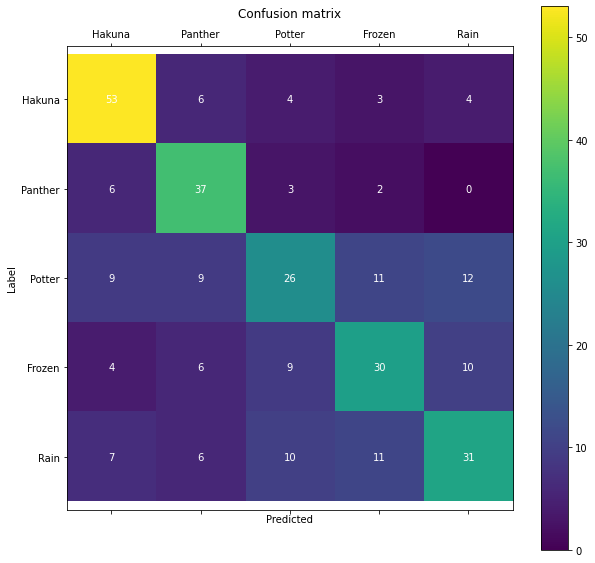

In [ ]:
# confusion matrix heatmap function to display confusion matrix heatmap when recalling the function
from sklearn.metrics import confusion_matrix
def confusion_matrix_heatmap(y_val, yv_p):
    """Function to plot a confusion matrix"""
    labels = list(set(y_val))   # get the labels in the y_test
    # print(labels)
    cm = confusion_matrix(y_val, yv_p)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix')
    #disply the classes name 
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=0)
    ax.set_yticklabels( labels)
    #count counts the values match
    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('Label')
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.1 
    t -= 0.1 
    plt.ylim(b, t)
    plt.show()

confusion_matrix_heatmap(y_val, yv_p)